In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [7]:
train = pd.read_csv("C:\\Users\\LOHANI\\Desktop\\bigmart-sales\\Train.csv")

test = pd.read_csv("C:\\Users\\LOHANI\\Desktop\\bigmart-sales\\Test.csv")
train['source'] = 'train'
test['source'] = 'test'
data = pd.concat([train, test], ignore_index=True)
data.head()

E:\python3.7\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train


In [8]:
data.apply(lambda x: len(x.unique()))

Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3494
Item_Type                       16
Item_Visibility              13006
Item_Weight                    416
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      4
Outlet_Type                      4
source                           2
dtype: int64

In [9]:
# check out the frequecy of each different category in each nomical value

# filter the categorical variables
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']

# exclude the id and source columns
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier', 'source']]

# print the frequency of categories
for col in categorical_columns:
    print('\nFrequency of Categories for variable %s'%(col))
    print(data[col].value_counts())


Frequency of Categories for variable Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for variable Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency of Categories for variable Outlet_Identifier
OUT027    1559
OUT013    1553
OUT035    1550
OUT049    1550
OUT046    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

Frequency of Categories f

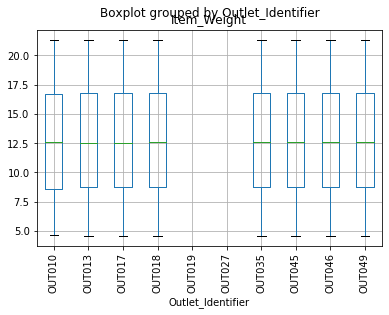

In [10]:
data.boxplot(column='Item_Weight', by='Outlet_Identifier', rot=90)

In [11]:
# average weight per item
item_av_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')
item_av_weight.head()

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115


In [12]:
# create a mask of the missing data in Item_Weight
null_mask_weight = data['Item_Weight'].isnull()

# impute values
data.loc[null_mask_weight, 'Item_Weight'] = data.loc[null_mask_weight, 'Item_Identifier'].apply(lambda x: item_av_weight.loc[x])

Text(0.5, 1.0, '')

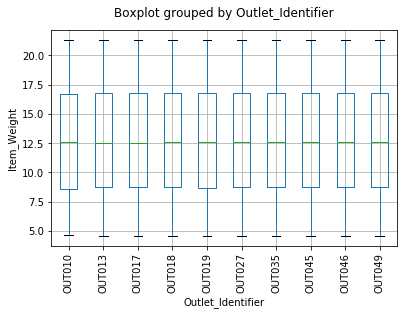

In [13]:
ax = data.boxplot(column='Item_Weight', by='Outlet_Identifier', rot=90)
ax.set_ylabel('Item_Weight')
ax.set_title('')

In [14]:
from scipy.stats import mode

# replace all nan values with 'unknown', because the mode function of stats can not compare a float (NaN) and a string
data['Outlet_Size'] = data['Outlet_Size'].fillna('unknown')

# mode size per Outlet_Type
outlet_type_mode_size = data.pivot_table(values='Outlet_Size', index='Outlet_Type', aggfunc=(lambda x:mode(x).mode[0]))
outlet_type_mode_size

E:\python3.7\lib\site-packages\scipy\stats\stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


,Outlet_Size
Outlet_Type,
Grocery Store,unknown
Supermarket Type1,Small
Supermarket Type2,Medium
Supermarket Type3,Medium


Text(0.5, 1.0, '')

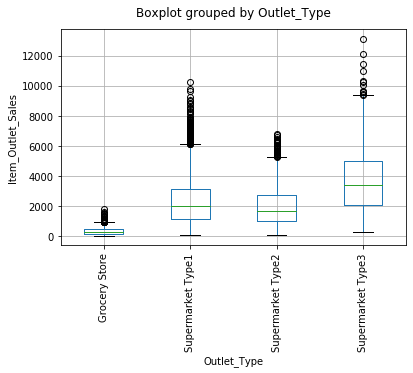

In [15]:
# sales per Outlet_Type
ax = data.boxplot(column='Item_Outlet_Sales', by='Outlet_Type', rot=90)
ax.set_ylabel('Item_Outlet_Sales')
ax.set_title('')

[Text(0, 0, 'Grocery Store'),
 Text(0, 0, 'Supermarket Type1'),
 Text(0, 0, 'Supermarket Type2'),
 Text(0, 0, 'Supermarket Type3')]

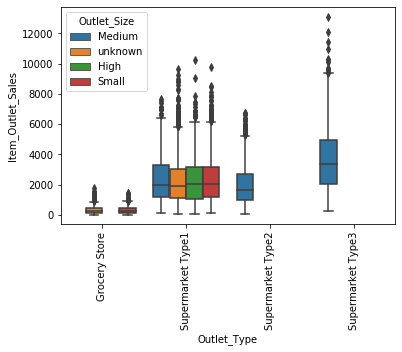

In [16]:
import seaborn as sns
ax = sns.boxplot(data=data, x='Outlet_Type', y='Item_Outlet_Sales', hue='Outlet_Size', order=['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
#ax = data.boxplot(column='Item_Outlet_Sales', by=['Outlet_Type', 'Outlet_Size'], rot=90)
#ax.set_ylabel('Item_Outlet_Sales')
#ax.set_title('')

Text(0.5, 1.0, '')

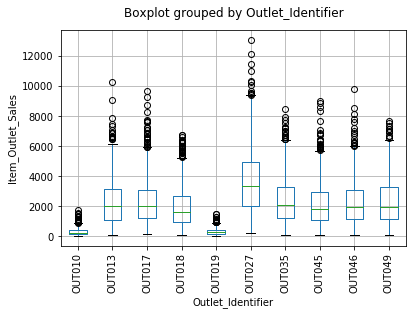

In [17]:
# sales per Outlet_Identifier
ax = data.boxplot(column='Item_Outlet_Sales', by='Outlet_Identifier', rot=90)
ax.set_ylabel('Item_Outlet_Sales')
ax.set_title('')

In [18]:
# print Outlet_Type of OUT010 and Out019
outlet_identifier_mode_size = data.pivot_table(values='Outlet_Size', index='Outlet_Identifier', aggfunc=(lambda x:mode(x).mode[0]))
outlet_identifier_mode_size

E:\python3.7\lib\site-packages\scipy\stats\stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


,Outlet_Size
Outlet_Identifier,
OUT010,unknown
OUT013,High
OUT017,unknown
OUT018,Medium
OUT019,Small
OUT027,Medium
OUT035,Small
OUT045,unknown
OUT046,Small


In [19]:
# replace the Outlet_Size of the Grocery Store in the pivot table with small
outlet_type_mode_size.loc['Grocery Store'] = 'Small'
outlet_type_mode_size

,Outlet_Size
Outlet_Type,
Grocery Store,Small
Supermarket Type1,Small
Supermarket Type2,Medium
Supermarket Type3,Medium


In [20]:
# create a mask of the missing data in Item_Weight
null_mask_size = data['Outlet_Size']=='unknown'

# impute values
data.loc[null_mask_size, 'Outlet_Size'] = data.loc[null_mask_size, 'Outlet_Type'].apply(lambda x: outlet_type_mode_size.loc[x])

# check no missing values
#print(data['Outlet_Size'].head(10))
#print(data.info())

In [21]:
# print Outlet_Type of OUT010 and Out019
outlet_identifier_mode_size = data.pivot_table(values='Outlet_Size', index='Outlet_Identifier', aggfunc=(lambda x:mode(x).mode[0]))
outlet_identifier_mode_size

,Outlet_Size
Outlet_Identifier,
OUT010,Small
OUT013,High
OUT017,Small
OUT018,Medium
OUT019,Small
OUT027,Medium
OUT035,Small
OUT045,Small
OUT046,Small


In [22]:
data.pivot_table(values='Outlet_Type', index='Outlet_Identifier', aggfunc=(lambda x:mode(x).mode[0]))

,Outlet_Type
Outlet_Identifier,
OUT010,Grocery Store
OUT013,Supermarket Type1
OUT017,Supermarket Type1
OUT018,Supermarket Type2
OUT019,Grocery Store
OUT027,Supermarket Type3
OUT035,Supermarket Type1
OUT045,Supermarket Type1
OUT046,Supermarket Type1


In [23]:
# check how many entries have 0
data['Item_Visibility'].value_counts().head()

0.000000    879
0.076856      3
0.076841      3
0.077290      3
0.077169      3
Name: Item_Visibility, dtype: int64

In [24]:
# visual check that the 0 values in the firs 10 entries have been replaced
data['Item_Visibility'] = data['Item_Visibility'].replace({0:np.nan})

[Text(0, 0, 'Dairy'),
 Text(0, 0, 'Soft Drinks'),
 Text(0, 0, 'Meat'),
 Text(0, 0, 'Fruits and Vegetables'),
 Text(0, 0, 'Household'),
 Text(0, 0, 'Baking Goods'),
 Text(0, 0, 'Snack Foods'),
 Text(0, 0, 'Frozen Foods'),
 Text(0, 0, 'Breakfast'),
 Text(0, 0, 'Health and Hygiene'),
 Text(0, 0, 'Hard Drinks'),
 Text(0, 0, 'Canned'),
 Text(0, 0, 'Breads'),
 Text(0, 0, 'Starchy Foods'),
 Text(0, 0, 'Others'),
 Text(0, 0, 'Seafood')]

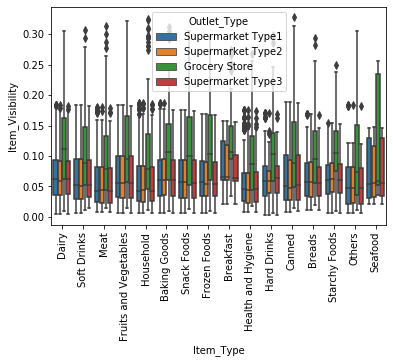

In [25]:
ax = sns.boxplot(data=data, x='Item_Type', y='Item_Visibility', hue='Outlet_Type')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [26]:
data['Item_Visibility'].head(10)

0    0.016047
1    0.019278
2    0.016760
3         NaN
4         NaN
5         NaN
6    0.012741
7    0.127470
8    0.016687
9    0.094450
Name: Item_Visibility, dtype: float64

In [27]:
# pivot table with the mean values that will be used to replace the nan values
table = data.pivot_table(values='Item_Visibility', index='Item_Type', columns='Outlet_Type', aggfunc='mean')
table

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Type,,,,
Baking Goods,0.116306,0.066692,0.068206,0.066524
Breads,0.111612,0.067579,0.067976,0.066038
Breakfast,0.126056,0.079993,0.083079,0.078609
Canned,0.112484,0.066167,0.064655,0.067549
Dairy,0.120742,0.069299,0.069000,0.069213
Frozen Foods,0.115895,0.065449,0.064184,0.064816
Fruits and Vegetables,0.114820,0.067123,0.067503,0.066758
Hard Drinks,0.109913,0.064873,0.063611,0.065297
Health and Hygiene,0.098924,0.055021,0.053081,0.054924


In [28]:
# replace the nan values
# define function that returns the mean values
def find_mean(x):
    return table.loc[x['Item_Type'], x['Outlet_Type']]

# replace missing values in loan_amount with median values
data['Item_Visibility'].fillna(data[data['Item_Visibility'].isnull()].apply(find_mean, axis=1), inplace=True)

[Text(0, 0, 'Dairy'),
 Text(0, 0, 'Soft Drinks'),
 Text(0, 0, 'Meat'),
 Text(0, 0, 'Fruits and Vegetables'),
 Text(0, 0, 'Household'),
 Text(0, 0, 'Baking Goods'),
 Text(0, 0, 'Snack Foods'),
 Text(0, 0, 'Frozen Foods'),
 Text(0, 0, 'Breakfast'),
 Text(0, 0, 'Health and Hygiene'),
 Text(0, 0, 'Hard Drinks'),
 Text(0, 0, 'Canned'),
 Text(0, 0, 'Breads'),
 Text(0, 0, 'Starchy Foods'),
 Text(0, 0, 'Others'),
 Text(0, 0, 'Seafood')]

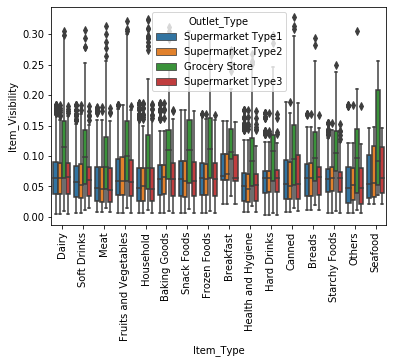

In [29]:
ax = sns.boxplot(data=data, x='Item_Type', y='Item_Visibility', hue='Outlet_Type')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [30]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF': 'Low Fat', 
                                                             'low fat': 'Low Fat', 
                                                             'reg': 'Regular'})
data['Item_Fat_Content'].head(5)

0    Low Fat
1    Regular
2    Low Fat
3    Regular
4    Low Fat
Name: Item_Fat_Content, dtype: object

In [31]:
print('\nFrequency of Categories for variable Item_Fat_Content')
print(data['Item_Fat_Content'].value_counts())


Frequency of Categories for variable Item_Fat_Content
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [32]:
data['Outlet_Age'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Age'].head(5)

0    14
1     4
2    14
3    15
4    26
Name: Outlet_Age, dtype: int64

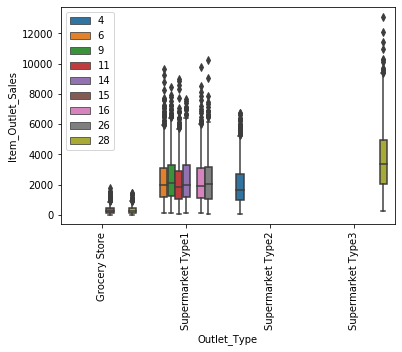

In [33]:
ax = sns.boxplot(data=data, x='Outlet_Type', y='Item_Outlet_Sales', hue='Outlet_Age', order=['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
leg = ax.legend()
ax.legend(loc='upper left')

In [34]:
data['Item_Type_Category'] = data['Item_Identifier'].astype(str).str[:3]
data['Item_Type_Category'].unique()

array(['FDA', 'DRC', 'FDN', 'FDX', 'NCD', 'FDP', 'FDO', 'FDH', 'FDU',
       'FDY', 'FDS', 'FDF', 'NCB', 'DRI', 'FDW', 'FDC', 'FDR', 'FDV',
       'DRJ', 'FDE', 'NCS', 'DRH', 'NCX', 'DRZ', 'FDB', 'FDK', 'FDL',
       'FDM', 'NCP', 'NCL', 'DRK', 'FDI', 'FDZ', 'NCI', 'FDJ', 'FDG',
       'NCZ', 'FDQ', 'FDD', 'DRG', 'NCR', 'FDT', 'DRB', 'DRE', 'DRA',
       'NCF', 'NCH', 'NCO', 'NCN', 'NCC', 'DRD', 'DRF', 'DRL', 'NCM',
       'NCU', 'DRY', 'NCW', 'DRM', 'NCT', 'NCQ', 'DRP', 'DRQ', 'NCK',
       'NCY', 'DRN', 'NCA', 'NCE', 'NCJ', 'NCV', 'NCG', 'DRO'],
      dtype=object)

In [35]:
data['Item_Type_Category'] = data['Item_Identifier'].astype(str).str[:2]
data['Item_Type_Category'].unique()

array(['FD', 'DR', 'NC'], dtype=object)

In [36]:
data['Item_Type_Category'] = data['Item_Type_Category'].map({'FD': 'Food', 'DR':'Drink', 'NC':'Non-Consumable'})

In [37]:
data['Item_Type_Category'].value_counts()

Food              10201
Non-Consumable     2686
Drink              1317
Name: Item_Type_Category, dtype: int64

In [38]:
data.loc[data['Item_Type_Category']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

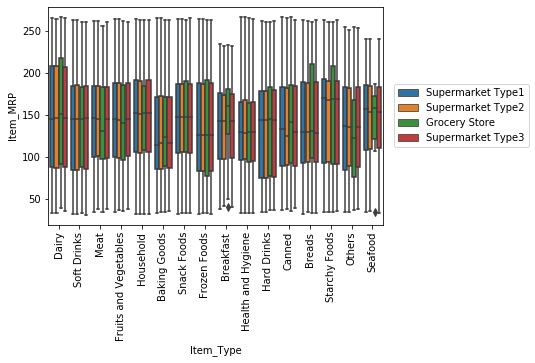

In [39]:
ax = sns.boxplot(data=data, x='Item_Type', y='Item_MRP', hue='Outlet_Type')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
leg = ax.legend()
ax.legend(loc='center right', bbox_to_anchor=(1.45, 0.5))

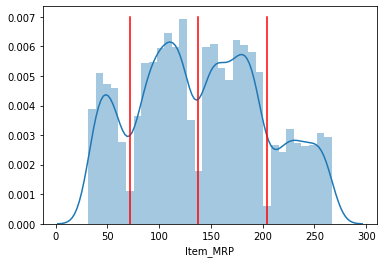

In [40]:
ax = sns.distplot(data['Item_MRP'])
x1=72
x2=138
x3=204
ax.plot([x1, x1],[0, 0.007], color='r')
ax.plot([x2, x2],[0, 0.007],color='r')
ax.plot([x3, x3],[0, 0.007],color='r')
plt.show()

In [41]:
def price_cat(x):
    if x <= x1:
        return 'Low'
    elif (x > x1) & (x <= x2):
        return 'Medium'
    elif (x > x2) & (x <= x3):
        return 'High'
    else:
        return 'Very High'

data['Item_MRP_Category'] = data['Item_MRP']
data['Item_MRP_Category'] = data['Item_MRP_Category'].apply(price_cat)
data['Item_MRP_Category'].value_counts()

High         4934
Medium       4659
Very High    2400
Low          2211
Name: Item_MRP_Category, dtype: int64

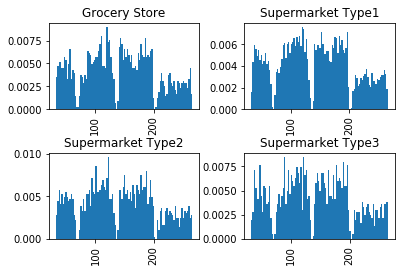

In [42]:
ax = data.hist(column='Item_MRP' , by='Outlet_Type', bins=100, density=True)

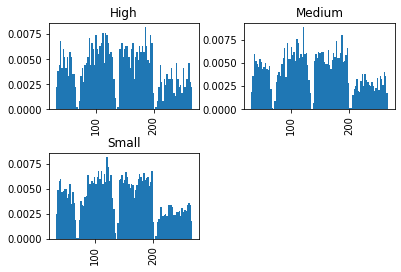

In [43]:
ax = data.hist(column='Item_MRP' , by='Outlet_Size', bins=100, density=True)

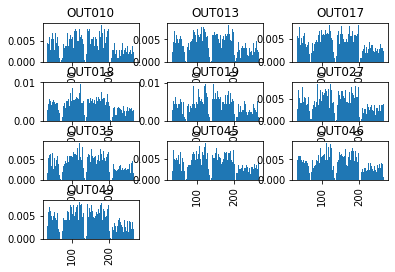

In [44]:
ax = data.hist(column='Item_MRP' , by='Outlet_Identifier', bins=100, density=True)

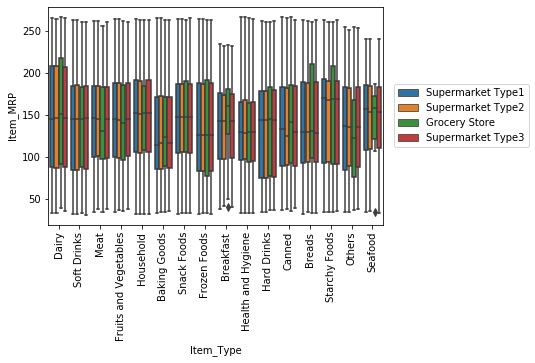

In [45]:
ax = sns.boxplot(data=data, x='Item_Type', y='Item_MRP', hue='Outlet_Type')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
leg = ax.legend()
ax.legend(loc='center right', bbox_to_anchor=(1.45, 0.5))

W0817 20:29:03.640584  3884 legend.py:1282] No handles with labels found to put in legend.
W0817 20:29:03.643586  3884 legend.py:1282] No handles with labels found to put in legend.


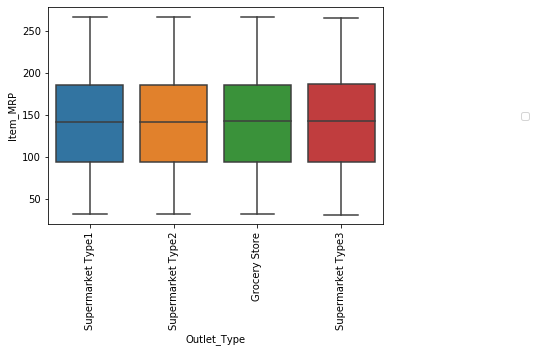

In [46]:
ax = sns.boxplot(data=data, x='Outlet_Type', y='Item_MRP')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
leg = ax.legend()
ax.legend(loc='center right', bbox_to_anchor=(1.45, 0.5))

W0817 20:29:08.718047  3884 legend.py:1282] No handles with labels found to put in legend.
W0817 20:29:08.733675  3884 legend.py:1282] No handles with labels found to put in legend.


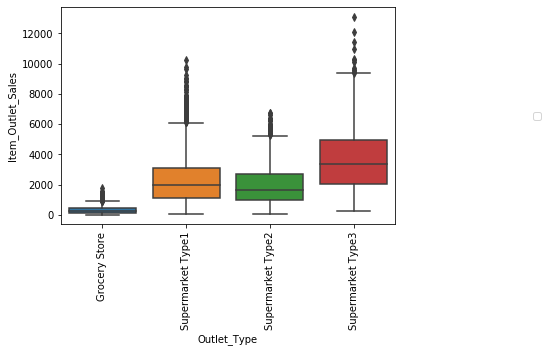

In [47]:
ax = sns.boxplot(data=data, x='Outlet_Type', y='Item_Outlet_Sales', order=['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
leg = ax.legend()
ax.legend(loc='center right', bbox_to_anchor=(1.45, 0.5))

[Text(0, 0, 'Grocery Store'),
 Text(0, 0, 'Supermarket Type1'),
 Text(0, 0, 'Supermarket Type2'),
 Text(0, 0, 'Supermarket Type3')]

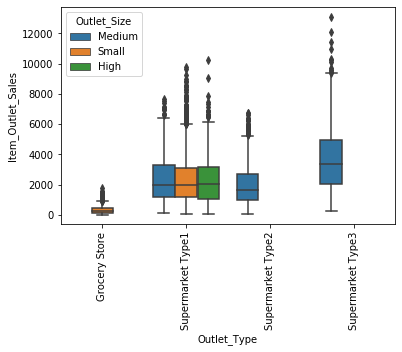

In [48]:
# Item_Outlet_Sales per Outlet_Type and Outlet_Size
ax = sns.boxplot(data=data, x='Outlet_Type', y='Item_Outlet_Sales', hue='Outlet_Size', order=['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

[Text(0, 0, 'Dairy'),
 Text(0, 0, 'Soft Drinks'),
 Text(0, 0, 'Meat'),
 Text(0, 0, 'Fruits and Vegetables'),
 Text(0, 0, 'Household'),
 Text(0, 0, 'Baking Goods'),
 Text(0, 0, 'Snack Foods'),
 Text(0, 0, 'Frozen Foods'),
 Text(0, 0, 'Breakfast'),
 Text(0, 0, 'Health and Hygiene'),
 Text(0, 0, 'Hard Drinks'),
 Text(0, 0, 'Canned'),
 Text(0, 0, 'Breads'),
 Text(0, 0, 'Starchy Foods'),
 Text(0, 0, 'Others'),
 Text(0, 0, 'Seafood')]

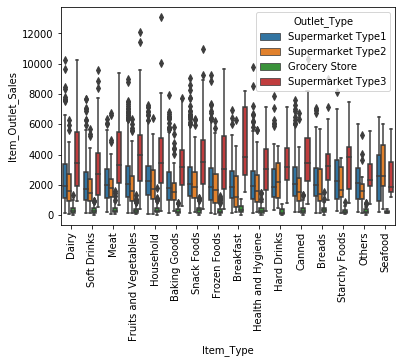

In [49]:
ax = sns.boxplot(data=data, x='Item_Type', y='Item_Outlet_Sales', hue='Outlet_Type')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

[Text(0, 0, 'Grocery Store'),
 Text(0, 0, 'Supermarket Type1'),
 Text(0, 0, 'Supermarket Type2'),
 Text(0, 0, 'Supermarket Type3')]

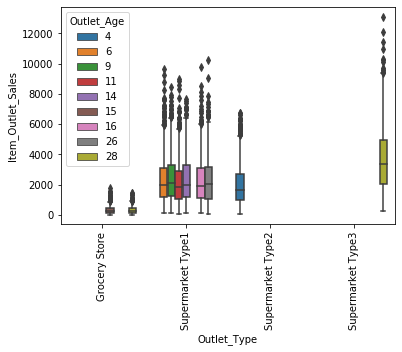

In [50]:
# Item_Outlet_Sales per Outlet_Type and Outlet_Age
ax = sns.boxplot(data=data, x='Outlet_Type', y='Item_Outlet_Sales', hue='Outlet_Age', order=['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

[Text(0, 0, 'OUT049'),
 Text(0, 0, 'OUT018'),
 Text(0, 0, 'OUT010'),
 Text(0, 0, 'OUT013'),
 Text(0, 0, 'OUT027'),
 Text(0, 0, 'OUT045'),
 Text(0, 0, 'OUT017'),
 Text(0, 0, 'OUT046'),
 Text(0, 0, 'OUT035'),
 Text(0, 0, 'OUT019')]

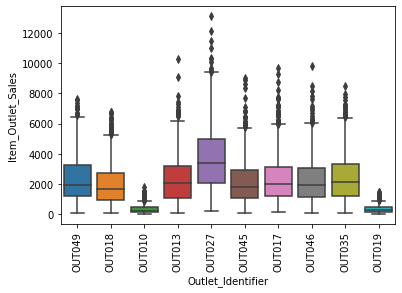

In [51]:
# Item_Outlet_Sales per Outlet_Identifier
ax = sns.boxplot(data=data, x='Outlet_Identifier', y='Item_Outlet_Sales')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [52]:
for i in data['Outlet_Identifier'].unique():
    otype = data[data['Outlet_Identifier']==i]['Outlet_Type'].unique()
    osize = data[data['Outlet_Identifier']==i]['Outlet_Size'].unique()
    print('Outlet_Identifier: {}, Outlet_Type(s): {}, Outlet_Size: {}'.format(i, otype, osize))

Outlet_Identifier: OUT049, Outlet_Type(s): ['Supermarket Type1'], Outlet_Size: ['Medium']
Outlet_Identifier: OUT018, Outlet_Type(s): ['Supermarket Type2'], Outlet_Size: ['Medium']
Outlet_Identifier: OUT010, Outlet_Type(s): ['Grocery Store'], Outlet_Size: ['Small']
Outlet_Identifier: OUT013, Outlet_Type(s): ['Supermarket Type1'], Outlet_Size: ['High']
Outlet_Identifier: OUT027, Outlet_Type(s): ['Supermarket Type3'], Outlet_Size: ['Medium']
Outlet_Identifier: OUT045, Outlet_Type(s): ['Supermarket Type1'], Outlet_Size: ['Small']
Outlet_Identifier: OUT017, Outlet_Type(s): ['Supermarket Type1'], Outlet_Size: ['Small']
Outlet_Identifier: OUT046, Outlet_Type(s): ['Supermarket Type1'], Outlet_Size: ['Small']
Outlet_Identifier: OUT035, Outlet_Type(s): ['Supermarket Type1'], Outlet_Size: ['Small']
Outlet_Identifier: OUT019, Outlet_Type(s): ['Grocery Store'], Outlet_Size: ['Small']


In [53]:
data['Item_Number_Sales'] = data['Item_Outlet_Sales']/data['Item_MRP']

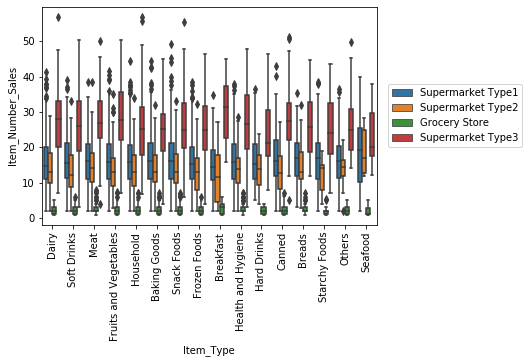

In [54]:
ax = sns.boxplot(data=data, x='Item_Type', y='Item_Number_Sales', hue='Outlet_Type')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
leg = ax.legend()
ax.legend(loc='center right', bbox_to_anchor=(1.45, 0.5))

W0817 20:29:55.940190  3884 legend.py:1282] No handles with labels found to put in legend.
W0817 20:29:55.943192  3884 legend.py:1282] No handles with labels found to put in legend.


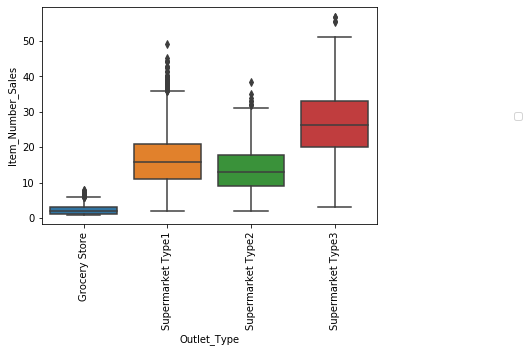

In [55]:
ax = sns.boxplot(data=data, x='Outlet_Type', y='Item_Number_Sales', order=['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
leg = ax.legend()
ax.legend(loc='center right', bbox_to_anchor=(1.45, 0.5))

[Text(0, 0, 'Grocery Store'),
 Text(0, 0, 'Supermarket Type1'),
 Text(0, 0, 'Supermarket Type2'),
 Text(0, 0, 'Supermarket Type3')]

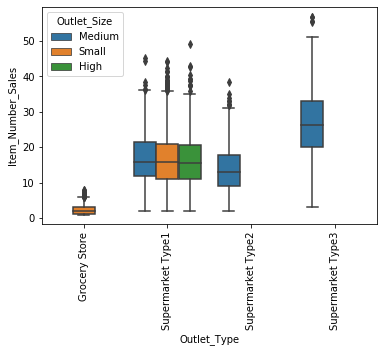

In [56]:
# Item_Outlet_Sales per Outlet_Type and Outlet_Size
ax = sns.boxplot(data=data, x='Outlet_Type', y='Item_Number_Sales', hue='Outlet_Size', order=['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

[Text(0, 0, 'OUT049'),
 Text(0, 0, 'OUT018'),
 Text(0, 0, 'OUT010'),
 Text(0, 0, 'OUT013'),
 Text(0, 0, 'OUT027'),
 Text(0, 0, 'OUT045'),
 Text(0, 0, 'OUT017'),
 Text(0, 0, 'OUT046'),
 Text(0, 0, 'OUT035'),
 Text(0, 0, 'OUT019')]

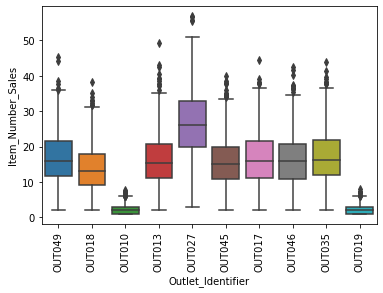

In [57]:
# Item_Outlet_Sales per Outlet_Identifier
ax = sns.boxplot(data=data, x='Outlet_Identifier', y='Item_Number_Sales')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

E:\python3.7\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


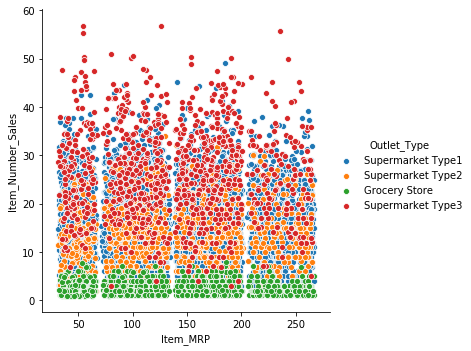

In [58]:
sns.pairplot(data=data, x_vars='Item_MRP', y_vars='Item_Number_Sales', hue='Outlet_Type', size=5)

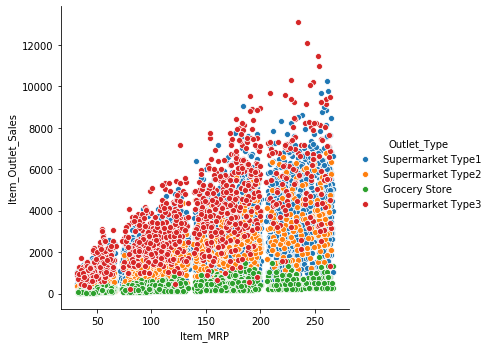

In [59]:
sns.pairplot(data=data, x_vars='Item_MRP', y_vars='Item_Outlet_Sales', hue='Outlet_Type', size=5)

In [60]:
cor1 = data['Item_MRP'].corr(data['Item_Outlet_Sales'])
cor2 = data['Item_MRP'].corr(data['Item_Number_Sales'])
print('Correlation between Item_MRP and Item_Outlet_Sales: {}'.format(cor1))
print('Correlation between Item_MRP and Item_Number_Sales: {}'.format(cor2))

Correlation between Item_MRP and Item_Outlet_Sales: 0.5675744466569194
Correlation between Item_MRP and Item_Number_Sales: 0.011143527012324836


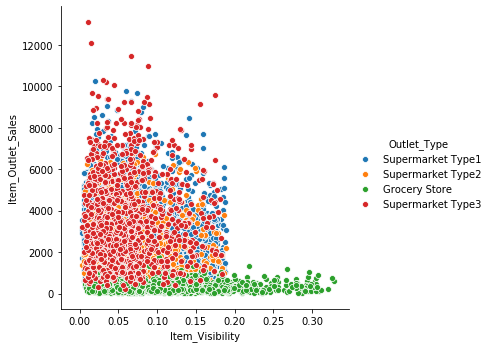

In [61]:
sns.pairplot(data=data, x_vars='Item_Visibility', y_vars='Item_Outlet_Sales', hue='Outlet_Type', size=5)

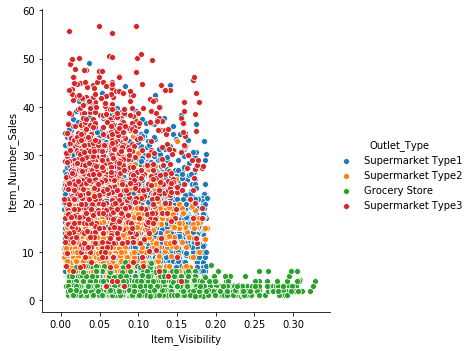

In [62]:
sns.pairplot(data=data, x_vars='Item_Visibility', y_vars='Item_Number_Sales', hue='Outlet_Type', size=5)

In [63]:
cor1 = data['Item_Visibility'].corr(data['Item_Outlet_Sales'])
cor2 = data['Item_Visibility'].corr(data['Item_Number_Sales'])
print('Correlation between Item_Visibility and Item_Outlet_Sales: {}'.format(cor1))
print('Correlation between Item_Visibility and Item_Number_Sales: {}'.format(cor2))

Correlation between Item_Visibility and Item_Outlet_Sales: -0.1407617468766223
Correlation between Item_Visibility and Item_Number_Sales: -0.17440844918045093


In [64]:
# check out the frequecy of each different category in each nomical value

# filter the categorical variables
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']

# exclude the id and source columns
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier', 'source']]

# print the frequency of categories
for col in categorical_columns:
    print('\nFrequency of Categories for variable %s'%(col))
    print(data[col].value_counts())


Frequency of Categories for variable Item_Fat_Content
Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for variable Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency of Categories for variable Outlet_Identifier
OUT027    1559
OUT013    1553
OUT035    1550
OUT049    1550
OUT046    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

Frequency of Categories for variable Outlet_Loca

In [65]:
data.to_csv('C:\\Users\\LOHANI\\Desktop\\bigmart-sales\\data.csv', index=False)

In [66]:
# drop the Outlet_Establishment_Year and Item_Number_Sales columns from the data
data = data.drop(['Outlet_Establishment_Year','Item_Number_Sales'], axis=1)
data.dtypes

Item_Fat_Content         object
Item_Identifier          object
Item_MRP                float64
Item_Outlet_Sales       float64
Item_Type                object
Item_Visibility         float64
Item_Weight             float64
Outlet_Identifier        object
Outlet_Location_Type     object
Outlet_Size              object
Outlet_Type              object
source                   object
Outlet_Age                int64
Item_Type_Category       object
Item_MRP_Category        object
dtype: object

In [153]:
from copy import deepcopy
data_copy = deepcopy(data)

In [154]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# create variables to keep the information of the Outlet_Identifiers
data_copy['Outlet'] = le.fit_transform(data_copy['Outlet_Identifier'])

# convert all categories of nominal variables into numeric types
var_mod = ['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type',
           'Outlet_Size', 'Outlet_Type', 'Item_Type_Category', 
           'Item_MRP_Category', 'Outlet']

le = LabelEncoder()

for i in var_mod:
    data_copy[i] = le.fit_transform(data_copy[i])

In [155]:
data_copy.to_csv('C:\\Users\\LOHANI\\Desktop\\bigmart-sales\\data_copy.csv', index=False)

In [156]:
data_copy2 = deepcopy(data_copy)

In [157]:
# one-hot coding:  creating dummy variables, one for each category of a categorical variable 
data_copy2 = pd.get_dummies(data_copy2, columns=['Item_Fat_Content', 'Item_Type', 
                                     'Outlet_Location_Type',
                                     'Outlet_Size', 'Outlet_Type', 
                                     'Item_Type_Category', 
                                     'Item_MRP_Category', 'Outlet'])

In [158]:
data_copy2.to_csv('C:\\Users\\LOHANI\\Desktop\\bigmart-sales\\data_copy2.csv', index=False)

In [159]:
data_copy3 = deepcopy(data_copy2)

In [160]:
from sklearn import preprocessing

# standardisation of numerical data
X = data_copy3[['Item_Visibility', 'Item_Weight', 'Outlet_Age']]
standardized_X = preprocessing.scale(X.values, with_mean=True)
data_copy3[['Item_Visibility', 'Item_Weight', 'Outlet_Age']] = standardized_X

In [161]:
data_copy3.to_csv('C:\\Users\\LOHANI\\Desktop\\bigmart-sales\\data_copy3.csv', index=False)

In [162]:
# divide into train and test
train_s = data_copy3.loc[data_copy3['source']=='train']
test_s = data_copy3.loc[data_copy3['source']=='test']

# drop unnecessary columns
train_s.drop(['source'], axis=1, inplace=True)
test_s.drop(['Item_Outlet_Sales', 'source'], axis=1, inplace=True)

# export to files
train_s.to_csv('C:\\Users\\LOHANI\\Desktop\\bigmart-sales\\train_s.csv', index=False)
test_s.to_csv('C:\\Users\\LOHANI\\Desktop\\bigmart-sales\\test_s.csv', index=False)

E:\python3.7\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [163]:
# divide into train and test
train = data_copy2.loc[data_copy2['source']=='train']
test = data_copy2.loc[data_copy2['source']=='test']

# drop unnecessary columns
train.drop(['source'], axis=1, inplace=True)
test.drop(['Item_Outlet_Sales', 'source'], axis=1, inplace=True)

# export to files
#train.to_csv('/Users/shusasaki/Documents/github/data_science_projects_editing/MartSales/modified_data/train.csv', index=False)
#test.to_csv('/Users/shusasaki/Documents/github/data_science_projects_editing/MartSales/modified_data/test.csv', index=False)

In [164]:
# divide into train and test
train_num_cat = data_copy.loc[data_copy['source']=='train']
test_num_cat = data_copy.loc[data_copy['source']=='test']

# drop unnecessary columns
train_num_cat.drop(['source'], axis=1, inplace=True)
test_num_cat.drop(['Item_Outlet_Sales', 'source'], axis=1, inplace=True)

# export to files
#train_num_cat.to_csv('/Users/shusasaki/Documents/github/data_science_projects_editing/MartSales/modified_data/train_num_cat.csv', index=False)
#test_num_cat.to_csv('/Users/shusasaki/Documents/github/data_science_projects_editing/MartSales/modified_data/test_num_cat.csv', index=False)

In [165]:
# divide into train and test
otrain = data.loc[data['source']=='train']
otest = data.loc[data['source']=='test']

# drop unnecessary columns
otrain.drop(['source'], axis=1, inplace=True)
otest.drop(['Item_Outlet_Sales', 'source'], axis=1, inplace=True)

# export to files
#otrain.to_csv('/Users/shusasaki/Documents/github/data_science_projects_editing/MartSales/modified_data/otrain.csv', index=False)
#otest.to_csv('/Users/shusasaki/Documents/github/data_science_projects_editing/MartSales/modified_data/otest.csv', index=False)

In [166]:
from sklearn.model_selection import train_test_split

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(train_s.loc[:, train_s.columns != 'Item_Outlet_Sales'], train_s['Item_Outlet_Sales'], test_size=0.2, random_state=42)
X_train_s = X_train_s.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)
X_test_s = X_test_s.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)
print(X_train_s.shape, y_train_s.shape)
print(X_test_s.shape, y_test_s.shape)

(6818, 50) (6818,)
(1705, 50) (1705,)


In [81]:
X_train, X_test, y_train, y_test = train_test_split(train.loc[:, train.columns != 'Item_Outlet_Sales'], train['Item_Outlet_Sales'], test_size=0.2, random_state=42)
X_train = X_train.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)
X_test = X_test.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6818, 50) (6818,)
(1705, 50) (1705,)


In [82]:
X_train_num_cat, X_test_num_cat, y_train_num_cat, y_test_num_cat = train_test_split(train_num_cat.loc[:, train_num_cat.columns != 'Item_Outlet_Sales'], train_num_cat['Item_Outlet_Sales'], test_size=0.2, random_state=42)
X_train_num_cat = X_train_num_cat.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)
X_test_num_cat = X_test_num_cat.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)
print(X_train_num_cat.shape, y_train_num_cat.shape)
print(X_test_num_cat.shape, y_test_num_cat.shape)

(6818, 12) (6818,)
(1705, 12) (1705,)


In [83]:
# train the model and evaluate it with the RMSE
mean_sales = y_train_num_cat.mean()
X_test_num_cat['pred'] = mean_sales

from sklearn.metrics import mean_squared_error
print('RMSE: %.4g' %np.sqrt(mean_squared_error(y_test_num_cat.values, X_test_num_cat['pred'].values)))

RMSE: 1652


Text(0, 0.5, 'Predictions')

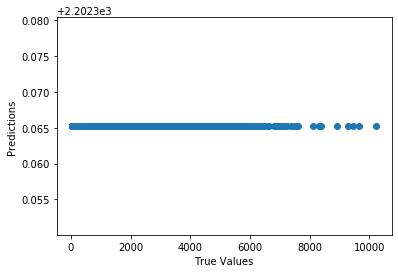

In [84]:
plt.scatter(y_test_num_cat, X_test_num_cat['pred'])
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [85]:
# define dataframe for submission
model1 = test_num_cat[['Item_Identifier', 'Outlet_Identifier']]
model1['Item_Outlet_Sales'] = mean_sales

# export submission file
#model1.to_csv('/Users/shusasaki/Documents/data_science_projects/datasets/MartSales data/final_models/model1.csv', index=False)

model1.head(10)

E:\python3.7\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
8523,FDW58,OUT049,2202.365231
8524,FDW14,OUT017,2202.365231
8525,NCN55,OUT010,2202.365231
8526,FDQ58,OUT017,2202.365231
8527,FDY38,OUT027,2202.365231
8528,FDH56,OUT046,2202.365231
8529,FDL48,OUT018,2202.365231
8530,FDC48,OUT027,2202.365231
8531,FDN33,OUT045,2202.365231
8532,FDA36,OUT017,2202.365231


In [86]:
# reinitialise the data
X_train_num_cat, X_test_num_cat, y_train_num_cat, y_test_num_cat = train_test_split(train_num_cat.loc[:, train_num_cat.columns != 'Item_Outlet_Sales'], train_num_cat['Item_Outlet_Sales'], test_size=0.2, random_state=42)

In [87]:
# pivot table with values Item_Outlet_Sales and index Item_Type_Category
X_train_num_cat['Item_Outlet_Sales'] = y_train_num_cat
item_category_sales_table = X_train_num_cat.pivot_table(values='Item_Outlet_Sales', index='Item_Type_Category')
item_category_sales_table

,Item_Outlet_Sales
Item_Type_Category,
0,2022.430537
1,2237.307754
2,2159.187339


In [88]:
# define function that returns the mean values
def find_sales_means(x):
    return item_category_sales_table.loc[x]

RMSE: 1651


Text(0, 0.5, 'Predictions')

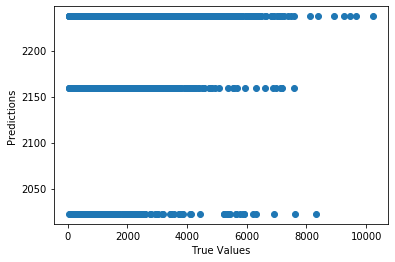

In [89]:
# evaluate model
X_test_num_cat['pred'] = X_test_num_cat['Item_Type_Category'].apply(find_sales_means)
print('RMSE: %.4g' %np.sqrt(mean_squared_error(y_test_num_cat.values, X_test_num_cat['pred'].values)))

plt.scatter(y_test_num_cat, X_test_num_cat['pred'])
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [90]:
# define submision model
model2 = test_num_cat[['Item_Identifier', 'Outlet_Identifier', 'Item_Type_Category']]
model2['Item_Outlet_Sales'] = model2['Item_Type_Category'].apply(find_sales_means)
model2 = model2.drop('Item_Type_Category', axis=1)

# export submission file
#model2.to_csv('/Users/shusasaki/Documents/data_science_projects/datasets/MartSales data/final_models/model2.csv', index=False)

model2.head(10)

E:\python3.7\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
8523,FDW58,OUT049,2237.307754
8524,FDW14,OUT017,2237.307754
8525,NCN55,OUT010,2159.187339
8526,FDQ58,OUT017,2237.307754
8527,FDY38,OUT027,2237.307754
8528,FDH56,OUT046,2237.307754
8529,FDL48,OUT018,2237.307754
8530,FDC48,OUT027,2237.307754
8531,FDN33,OUT045,2237.307754
8532,FDA36,OUT017,2237.307754


In [91]:
# reinitialise the data
X_train_num_cat, X_test_num_cat, y_train_num_cat, y_test_num_cat = train_test_split(train_num_cat.loc[:, train_num_cat.columns != 'Item_Outlet_Sales'], train_num_cat['Item_Outlet_Sales'], test_size=0.2, random_state=42)

In [92]:
# pivot table with values Item_Outlet_Sales and index Item_Type_Category and Outlet_Category
X_train_num_cat['Item_Outlet_Sales'] = y_train_num_cat
item_outlet_sales_table = X_train_num_cat.pivot_table(values='Item_Outlet_Sales', 
                                            index='Item_Type_Category', 
                                            columns='Outlet_Type')
item_outlet_sales_table

Outlet_Type,0,1,2,3
Item_Type_Category,,,,
0,308.407437,2148.264504,1915.547572,3340.198538
1,344.858118,2361.702345,2061.157693,3767.855604
2,361.037616,2337.223838,2012.974133,3477.177489


In [93]:
# define function that returns the mean values
def find_sales_means(x):
    return item_outlet_sales_table.loc[x['Item_Type_Category'], x['Outlet_Type']]

RMSE: 1417


Text(0, 0.5, 'Predictions')

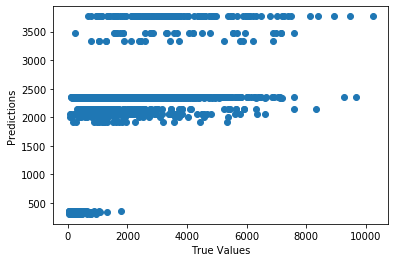

In [94]:
# eval model
# evaluate model
X_test_num_cat['pred'] = X_test_num_cat.apply(find_sales_means, axis=1)
print('RMSE: %.4g' %np.sqrt(mean_squared_error(y_test_num_cat.values, X_test_num_cat['pred'].values)))

plt.scatter(y_test_num_cat, X_test_num_cat['pred'])
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [95]:
# define submission file
model3 = test_num_cat[['Item_Identifier', 'Outlet_Identifier', 
               'Item_Type_Category', 'Outlet_Type']]

model3['Item_Outlet_Sales'] = model3.apply(find_sales_means, axis=1)
model3 = model3.drop(['Item_Type_Category', 'Outlet_Type'], axis=1)

# export submission file
#model3.to_csv('/Users/shusasaki/Documents/data_science_projects/datasets/MartSales data/final_models/model3.csv', index=False)

model3.head(10)

E:\python3.7\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
8523,FDW58,OUT049,2361.702345
8524,FDW14,OUT017,2361.702345
8525,NCN55,OUT010,361.037616
8526,FDQ58,OUT017,2361.702345
8527,FDY38,OUT027,3767.855604
8528,FDH56,OUT046,2361.702345
8529,FDL48,OUT018,2061.157693
8530,FDC48,OUT027,3767.855604
8531,FDN33,OUT045,2361.702345
8532,FDA36,OUT017,2361.702345


In [96]:
# reinitialise the data
X_train_num_cat, X_test_num_cat, y_train_num_cat, y_test_num_cat = train_test_split(train_num_cat.loc[:, train_num_cat.columns != 'Item_Outlet_Sales'], train_num_cat['Item_Outlet_Sales'], test_size=0.2, random_state=42)

In [97]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFECV

estimator = DecisionTreeRegressor(max_depth=10, min_samples_leaf=100)
selector = RFECV(estimator=estimator, cv=5)
selector = selector.fit(X_train, y_train)

Feature Ranking:
 Outlet_Location_Type_1    48
Outlet_9                  47
Outlet_8                  46
Outlet_7                  45
Item_Type_15              44
Outlet_6                  43
Item_Type_14              42
Outlet_5                  41
Item_Type_13              40
Outlet_4                  39
Item_Type_12              38
Outlet_3                  37
Item_Type_11              36
Outlet_2                  35
Item_Type_10              34
Outlet_1                  33
Item_Type_9               32
Outlet_0                  31
Item_Type_8               30
Item_Type_6               29
Item_MRP_Category_3       28
Item_MRP_Category_2       27
Item_Type_7               26
Item_MRP_Category_1       25
Item_Type_5               24
Item_Type_3               23
Item_Type_2               22
Item_Type_4               21
Item_Type_1               20
Outlet_Size_0             19
Item_Fat_Content_0        18
Item_Type_Category_1      17
Item_Fat_Content_1        16
Item_Type_Category_0     

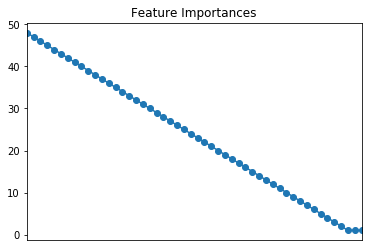

In [98]:
# visualise result
coefs = pd.Series(selector.ranking_, X_train.columns).sort_values(ascending=False)
ax=coefs.plot(title='Feature Importances', marker='o', rot=90)
ax.axes.get_xaxis().set_visible(False)
print("Feature Ranking:\n %s"% coefs)

In [99]:
from sklearn.ensemble import RandomForestRegressor

estimator = RandomForestRegressor(n_estimators=16, random_state=0)
selector = RFECV(estimator=estimator, cv=5)
selector = selector.fit(X_train, y_train)

Feature Ranking:
 Outlet_0                  35
Outlet_4                  34
Item_MRP_Category_1       33
Item_MRP_Category_2       32
Item_Type_11              31
Outlet_Type_2             30
Item_Type_12              29
Outlet_1                  28
Outlet_Type_1             27
Item_Fat_Content_1        26
Item_Type_1               25
Item_Type_7               24
Outlet_3                  23
Outlet_Size_0             22
Item_Type_2               21
Item_Type_15              20
Item_Type_Category_2      19
Outlet_Size_1             18
Outlet_Location_Type_1    17
Item_Type_8               16
Item_Type_Category_0      15
Item_MRP_Category_0       14
Item_Type_10              13
Item_Type_0               12
Outlet_Location_Type_2    11
Item_Type_14              10
Outlet_2                   9
Outlet_9                   8
Item_Type_3                7
Outlet_8                   6
Item_Type_9                5
Item_Type_4                4
Item_Type_5                3
Outlet_7                 

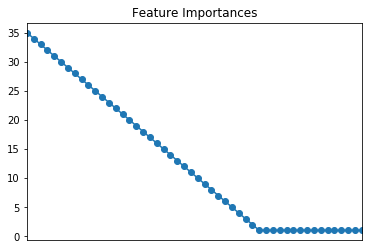

In [100]:
# visualise result
coefs = pd.Series(selector.ranking_, X_train.columns).sort_values(ascending=False)
ax=coefs.plot(title='Feature Importances', marker='o', rot=90)
ax.axes.get_xaxis().set_visible(False)
print("Feature Ranking:\n %s"% coefs)

In [101]:
features = list(coefs.index[:16])
not_features = list(coefs.index[16:])

In [102]:
with open('C:\\Users\\LOHANI\\Desktop\\bigmart-sales\\features.txt', 'w') as f:
    for item in features:
        f.write("%s\n" % item)

In [103]:
with open('C:\\Users\\LOHANI\\Desktop\\bigmart-sales\\not_features.txt', 'w') as f:
    for item in not_features:
        f.write("%s\n" % item)

In [104]:
X_train = X_train.drop(not_features, axis=1)

In [105]:
X_test = X_test.drop(not_features, axis=1)

In [106]:
test = test.drop(not_features, axis=1)

In [107]:
# define target and ID columns
target = 'Item_Outlet_Sales'
IDcols = ['Item_Identifier', 'Outlet_Identifier']

from sklearn.model_selection import cross_val_score
from sklearn import metrics

def modelfit(model, X_train, X_test, y_train, y_test, dtest, IDcols, target, filename):
    
    # fit algorithm to data
    model.fit(X_train, y_train)
    
    # predict training set
#    train_preds = model.predict(X_train)
    val_preds = model.predict(X_test)
    
    # perform cross-validation
    cv_score = cross_val_score(model, X_train, y_train, cv=20, scoring='neg_mean_squared_error')
#    print(cv_score)
    cv_score = np.sqrt(np.abs(cv_score))
#    print(cv_score)
    
    # print model report
    print('\nModel Report')
#    print('Training dataset RMSE: %.4g' %np.sqrt(metrics.mean_squared_error(train_preds, y_train)))
    print('Validation dataset RMSE: %.4g' %np.sqrt(metrics.mean_squared_error(val_preds, y_test)))
    print('CV score: Mean and 95%% confidence interval  - %.4g (+/- %0.2f)| Std - %.4g | Min - %.4g | Max - %.4g' % (np.mean(cv_score),np.std(cv_score) * 2,np.std(cv_score),np.min(cv_score),np.max(cv_score)))
#    print("Accuracy: %0.2f (+/- %0.2f)" % (np.mean(cv_score), np.std(cv_score) * 2))
    
    # predictors
#    predictors = [x for x in dtest.columns if x not in [target]+IDcol]
    
    # prediction on testing data
    dtest[target] = model.predict(dtest[X_train.columns])
    
    # export submission file
    IDcols.append(target)
    submission = pd.DataFrame({x:dtest[x] for x in IDcols})
    #submission.to_csv(filename, index=False)


Model Report
Validation dataset RMSE: 1144
CV score: Mean and 95% confidence interval  - 1222 (+/- 143.10)| Std - 71.55 | Min - 1027 | Max - 1313


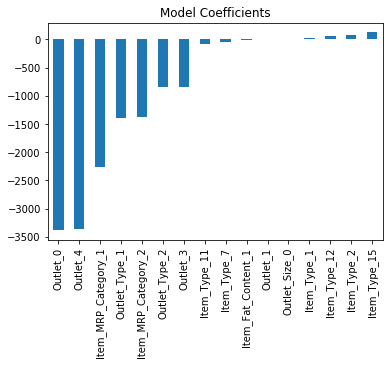

In [108]:
from sklearn.linear_model import LinearRegression

filename = '/Users/shusasaki/Documents/data_science_projects/datasets/MartSales data/final_models/model4.csv'
model4 = LinearRegression(normalize=True)
modelfit(model4, X_train, X_test, y_train, y_test, test, IDcols, target, filename)

# visualise result
coef4 = pd.Series(model4.coef_, X_train.columns).sort_values()
coef4.plot(kind='bar', title='Model Coefficients')


Model Report
Validation dataset RMSE: 1143
CV score: Mean and 95% confidence interval  - 1222 (+/- 144.43)| Std - 72.21 | Min - 1026 | Max - 1314


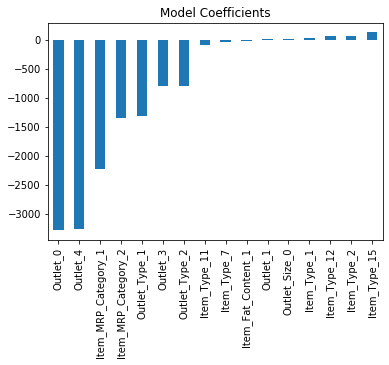

In [109]:
from sklearn.linear_model import Ridge

#predictors = [x for x in train_num_cat_one_hot.columns if x not in [target]+IDcols]
filename = '/Users/shusasaki/Documents/data_science_projects/datasets/MartSales data/final_models/model5.csv'
model5 = Ridge(alpha=0.01, normalize=True)
modelfit(model5, X_train, X_test, y_train, y_test, test, IDcols, target, filename)


# visualise result
coef5 = pd.Series(model5.coef_, X_train.columns).sort_values()
coef5.plot(kind='bar', title='Model Coefficients')


Model Report
Validation dataset RMSE: 1143
CV score: Mean and 95% confidence interval  - 1222 (+/- 143.25)| Std - 71.63 | Min - 1026 | Max - 1313


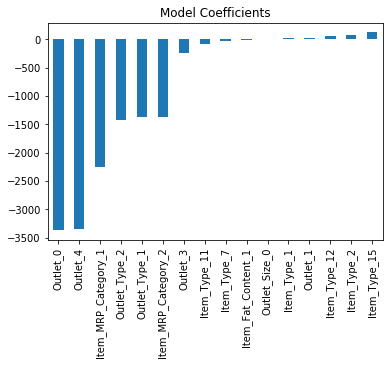

In [110]:
from sklearn.linear_model import Lasso

filename = '/Users/shusasaki/Documents/data_science_projects/datasets/MartSales data/final_models/model6.csv'
model6 = Lasso(alpha=0.01, normalize=True)
modelfit(model6, X_train, X_test, y_train, y_test, test, IDcols, target, filename)

# visualise result
coef6 = pd.Series(model6.coef_, X_train.columns).sort_values()
coef6.plot(kind='bar', title='Model Coefficients')

In [111]:
# function to run Ridge or Lasso Regressionwith difference values of alpha
def ridge_lasso_regression(alg, X_train, y_train, X_test, y_test, alpha):
    
    # define model
    if alg == 'Ridge':
        model = Ridge(alpha=alpha,normalize=True)
    else:
        model = Lasso(alpha=alpha,normalize=True, max_iter=1e2)
    
    # fit algorithm to data
    model.fit(X_train, y_train)
    
    # predict training set
    #train_predictions = model.predict(X_train)
    val_predictions = model.predict(X_test)
    
    # print the RSME 
    print('\nModel Report for alpha={}'.format(alpha))
    #print('Training dataset RMSE: %.4g' %np.sqrt(metrics.mean_squared_error(y_train, train_predictions)))
    print('Validation dataset RMSE: %.4g' %np.sqrt(metrics.mean_squared_error(y_test, val_predictions)))
    RMSE=np.sqrt(metrics.mean_squared_error(y_test, val_predictions))

    # print cross validation
    cv_score = cross_val_score(model, X_train, y_train, cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    print('CV score: Mean and 95%% confidence interval  - %.4g (+/- %0.2f)| Std - %.4g | Min - %.4g | Max - %.4g' % (np.mean(cv_score),np.std(cv_score) * 2,np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    # visualise
    fig = plt.figure()
    coef = pd.Series(model.coef_, X_train.columns).sort_values()
    coef.plot(kind='bar', title='Model Coefficients with alpha {} and RSME: {}'.format(alpha, RMSE))


Model Report for alpha=1e-15
Validation dataset RMSE: 1144


E:\python3.7\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.72283e-17): result may not be accurate.
  overwrite_a=True).T
E:\python3.7\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.28241e-17): result may not be accurate.
  overwrite_a=True).T
E:\python3.7\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.10479e-17): result may not be accurate.
  overwrite_a=True).T


CV score: Mean and 95% confidence interval  - 1222 (+/- 143.10)| Std - 71.55 | Min - 1027 | Max - 1313

Model Report for alpha=1e-10
Validation dataset RMSE: 1144
CV score: Mean and 95% confidence interval  - 1222 (+/- 143.10)| Std - 71.55 | Min - 1027 | Max - 1313

Model Report for alpha=1e-08
Validation dataset RMSE: 1144
CV score: Mean and 95% confidence interval  - 1222 (+/- 143.10)| Std - 71.55 | Min - 1027 | Max - 1313

Model Report for alpha=0.0001
Validation dataset RMSE: 1144
CV score: Mean and 95% confidence interval  - 1222 (+/- 143.11)| Std - 71.56 | Min - 1027 | Max - 1313

Model Report for alpha=0.001
Validation dataset RMSE: 1144
CV score: Mean and 95% confidence interval  - 1222 (+/- 143.24)| Std - 71.62 | Min - 1027 | Max - 1313

Model Report for alpha=0.01
Validation dataset RMSE: 1143
CV score: Mean and 95% confidence interval  - 1222 (+/- 144.43)| Std - 72.21 | Min - 1026 | Max - 1314

Model Report for alpha=1
Validation dataset RMSE: 1362
CV score: Mean and 95% con

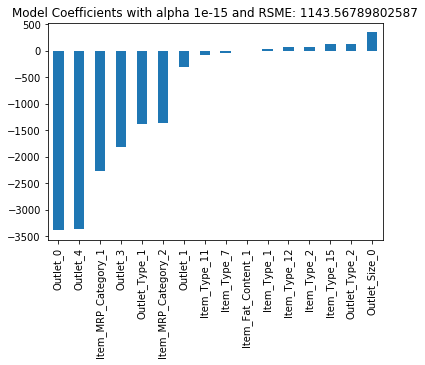

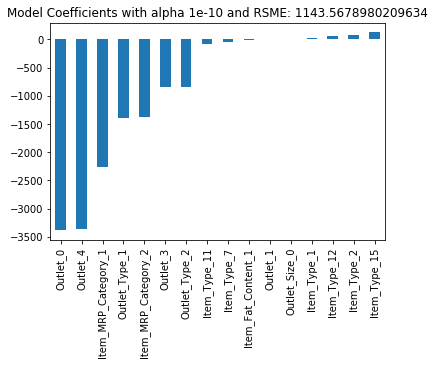

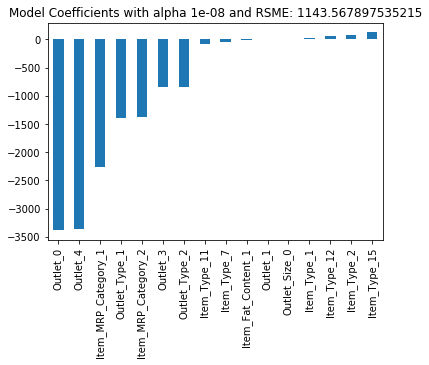

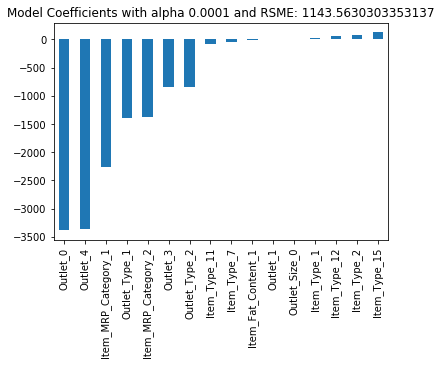

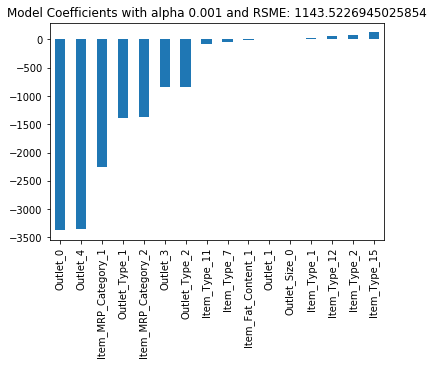

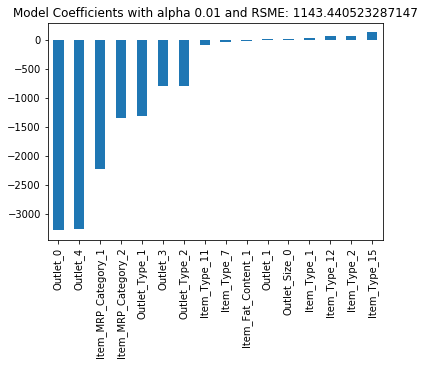

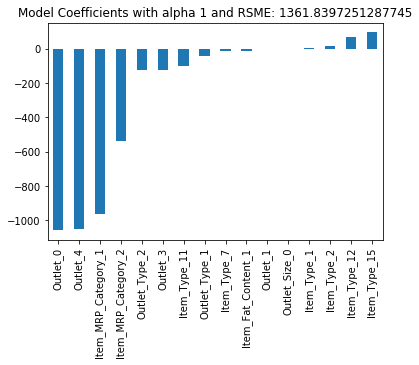

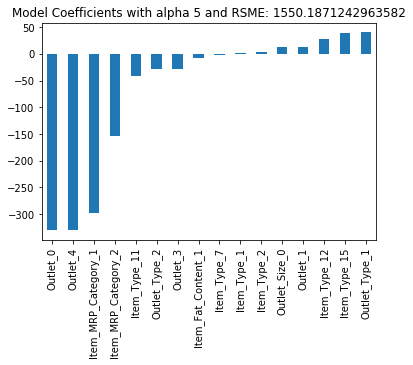

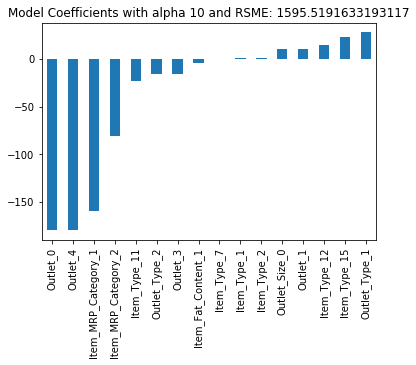

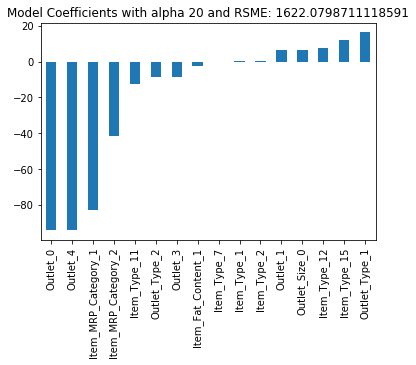

In [112]:
# set the different values of alpha to be tested
alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]

# run models
for i in range(10):
    ridge_lasso_regression('Ridge', X_train, y_train, X_test, y_test, alpha[i])

E:\python3.7\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3316884935.3306894, tolerance: 2016798.6508341574
  positive)
E:\python3.7\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2561879452.16147, tolerance: 1925313.4155202317
  positive)
E:\python3.7\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2356326618.2733526, tolerance: 1903756.1390408722
  positive)
E:\python3.7\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2789188486.7380557, tolerance: 1915391.21630


Model Report for alpha=1e-15
Validation dataset RMSE: 1144


E:\python3.7\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2693212641.655319, tolerance: 1915822.9914751374
  positive)
E:\python3.7\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 501208596.0733919, tolerance: 1924140.0436252488
  positive)
E:\python3.7\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2490312888.801908, tolerance: 1912382.3785673867
  positive)
E:\python3.7\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1892167388.6308084, tolerance: 1909550.159209

CV score: Mean and 95% confidence interval  - 1222 (+/- 143.10)| Std - 71.55 | Min - 1027 | Max - 1313

Model Report for alpha=1e-10
Validation dataset RMSE: 1144


E:\python3.7\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 147231012.44911003, tolerance: 2016798.6508341574
  positive)
E:\python3.7\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 137932806.85744953, tolerance: 1925313.4155202317
  positive)
E:\python3.7\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 139780851.398139, tolerance: 1903756.1390408722
  positive)
E:\python3.7\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 140626480.0689869, tolerance: 1915391.216309

CV score: Mean and 95% confidence interval  - 1222 (+/- 143.10)| Std - 71.55 | Min - 1027 | Max - 1313

Model Report for alpha=1e-08
Validation dataset RMSE: 1144


E:\python3.7\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 139776605.75651264, tolerance: 1903756.1390408722
  positive)
E:\python3.7\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 140605273.10308456, tolerance: 1915391.2163097763
  positive)
E:\python3.7\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 142537887.49568367, tolerance: 1931258.033966693
  positive)
E:\python3.7\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 138928346.09181118, tolerance: 1917315.8363

CV score: Mean and 95% confidence interval  - 1222 (+/- 143.10)| Std - 71.55 | Min - 1027 | Max - 1313


E:\python3.7\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 147237651.26238823, tolerance: 2016798.6508341574
  positive)
E:\python3.7\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 137971857.0203762, tolerance: 1925313.4155202317
  positive)
E:\python3.7\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 139824557.9459467, tolerance: 1903756.1390408722
  positive)
E:\python3.7\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 140652431.27201748, tolerance: 1915391.21630


Model Report for alpha=0.0001
Validation dataset RMSE: 1144


E:\python3.7\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 138976660.96331882, tolerance: 1917315.836395425
  positive)
E:\python3.7\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 141162316.15487576, tolerance: 1915822.9914751374
  positive)
E:\python3.7\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 141159165.27639008, tolerance: 1924140.0436252488
  positive)
E:\python3.7\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 137755402.0075016, tolerance: 1912382.37856

CV score: Mean and 95% confidence interval  - 1222 (+/- 143.10)| Std - 71.55 | Min - 1027 | Max - 1313

Model Report for alpha=0.001
Validation dataset RMSE: 1144


E:\python3.7\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 147693770.49058628, tolerance: 2016798.6508341574
  positive)
E:\python3.7\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 138397241.94143105, tolerance: 1925313.4155202317
  positive)
E:\python3.7\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 140243493.8230753, tolerance: 1903756.1390408722
  positive)
E:\python3.7\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 141062677.49900723, tolerance: 1915391.2163

CV score: Mean and 95% confidence interval  - 1222 (+/- 143.10)| Std - 71.55 | Min - 1027 | Max - 1313

Model Report for alpha=0.01
Validation dataset RMSE: 1143
CV score: Mean and 95% confidence interval  - 1222 (+/- 143.25)| Std - 71.63 | Min - 1026 | Max - 1313

Model Report for alpha=1
Validation dataset RMSE: 1199
CV score: Mean and 95% confidence interval  - 1274 (+/- 155.55)| Std - 77.77 | Min - 1086 | Max - 1376

Model Report for alpha=5
Validation dataset RMSE: 1525
CV score: Mean and 95% confidence interval  - 1582 (+/- 154.27)| Std - 77.13 | Min - 1432 | Max - 1698

Model Report for alpha=10
Validation dataset RMSE: 1652
CV score: Mean and 95% confidence interval  - 1719 (+/- 140.80)| Std - 70.4 | Min - 1584 | Max - 1826

Model Report for alpha=20
Validation dataset RMSE: 1652
CV score: Mean and 95% confidence interval  - 1719 (+/- 140.80)| Std - 70.4 | Min - 1584 | Max - 1826


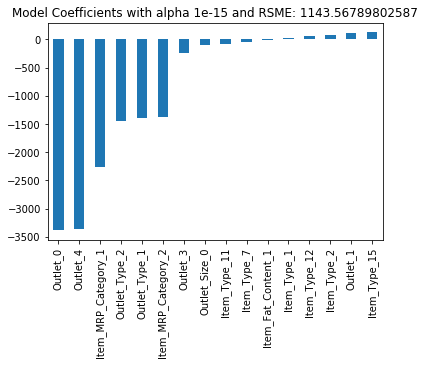

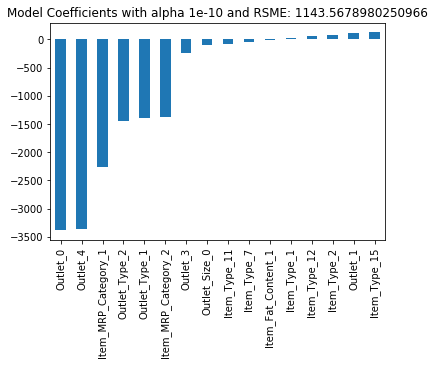

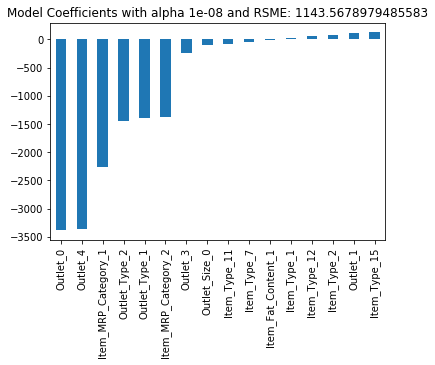

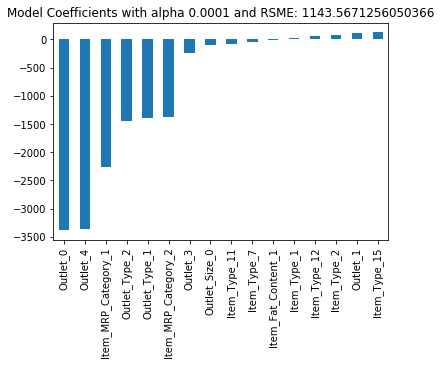

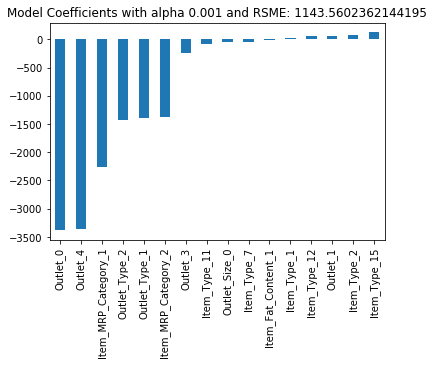

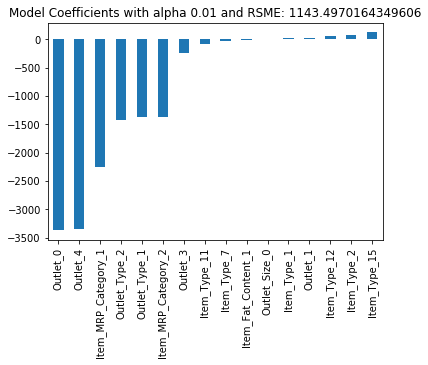

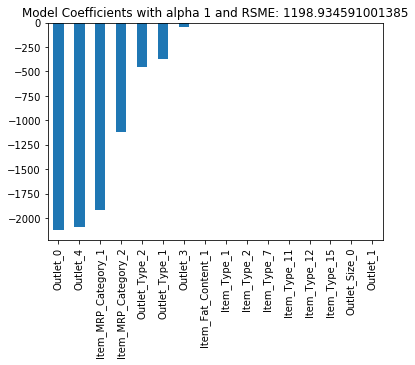

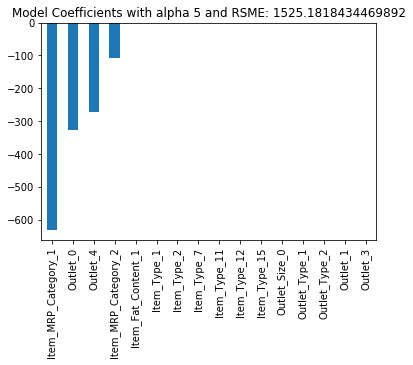

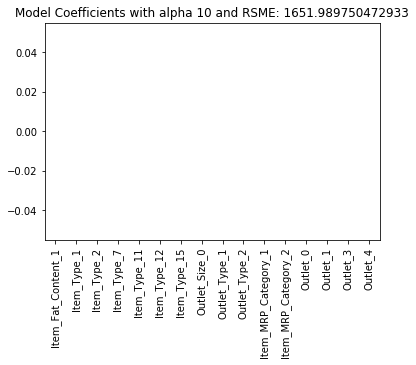

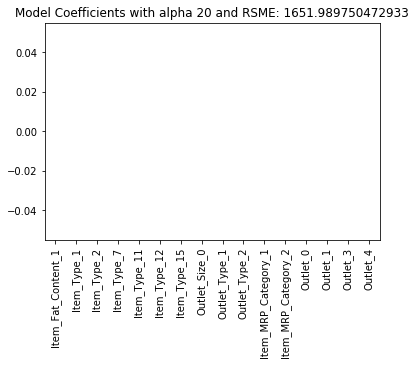

In [113]:
for i in range(10):
    ridge_lasso_regression('Lasso', X_train, y_train, X_test, y_test, alpha[i])


Model Report
Validation dataset RMSE: 1105
CV score: Mean and 95% confidence interval  - 1182 (+/- 150.79)| Std - 75.4 | Min - 978.1 | Max - 1283


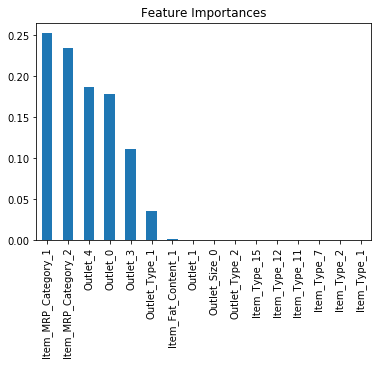

In [118]:
      # initial guess
from sklearn.tree import DecisionTreeRegressor

filename = "C:\\Users\\LOHANI\\Desktop\\bigmart-sales\\model7.csv"
model7 = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(model7, X_train, X_test, y_train, y_test, test, IDcols, target, filename)

# visualise result
coef7 = pd.Series(model7.feature_importances_, X_train.columns).sort_values(ascending=False)
coef7.plot(kind='bar', title='Feature Importances')                           

In [119]:
# function for parameter tunning
def decision_tree_regression_tune(model, X_train, y_train, X_test, y_test):
    
    # fit algorithm to data
    model.fit(X_train, y_train)
    
    # predict     
    test_pred = model.predict(X_test)
    
    # RSME 
    #print('Training dataset RMSE: %.4g' %np.sqrt(metrics.mean_squared_error(y_train, train_predictions)))
    #print('Validation dataset RMSE: %.4g' %np.sqrt(metrics.mean_squared_error(y_test, val_predictions)))
    RMSE=np.sqrt(metrics.mean_squared_error(y_test, test_pred))

    # cross validation
    cv_score = cross_val_score(model, X_train, y_train, cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    #print('CV score: Mean and 95%% confidence interval  - %.4g (+/- %0.2f)| Std - %.4g | Min - %.4g | Max - %.4g' % (np.mean(cv_score),np.std(cv_score) * 2,np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    cv_mean = np.mean(cv_score)
        
    return (RMSE, cv_mean)

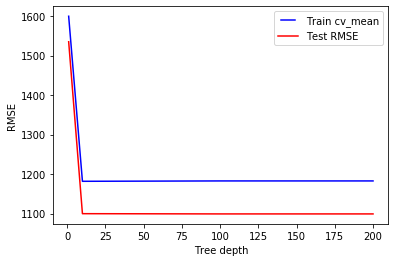

In [120]:
max_depths=[1, 10, 1e2, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
'''
max_depths=[1, 1e2, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
min_samples_leafs = np.linspace(0.1, 0.5, 10, endpoint=True)
'''
train_results = []
test_results = []

for max_depth in max_depths:
    
    # define model
    model = DecisionTreeRegressor(max_depth=max_depth)
    
    rmse, cvmean = decision_tree_regression_tune(model, X_train, y_train, X_test, y_test)
    train_results.append(cvmean)
    test_results.append(rmse)
    

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train cv_mean')
line2, = plt.plot(max_depths, test_results, 'r', label='Test RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMSE')
plt.xlabel('Tree depth')
plt.show()

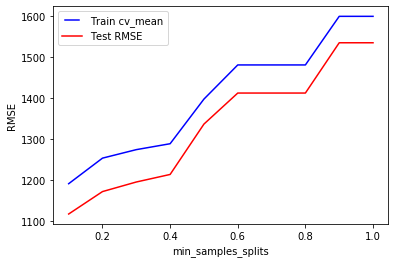

In [121]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
'''
max_depths=[1, 1e2, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
min_samples_leafs = np.linspace(0.1, 0.5, 10, endpoint=True)
'''
train_results = []
test_results = []

for min_samples_split in min_samples_splits:
    
    # define model
    model = DecisionTreeRegressor(min_samples_split=min_samples_split)
    
    rmse, cvmean = decision_tree_regression_tune(model, X_train, y_train, X_test, y_test)
    train_results.append(cvmean)
    test_results.append(rmse)
    

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train cv_mean')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMSE')
plt.xlabel('min_samples_splits')
plt.show()

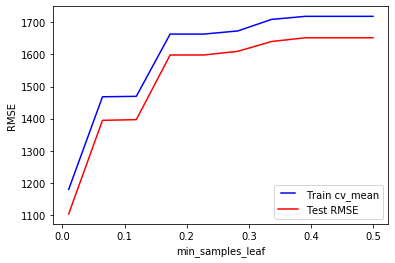

In [122]:
min_samples_leafs = np.linspace(0.01, 0.5, 10, endpoint=True)
'''
max_depths=[1, 1e2, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
min_samples_leafs = np.linspace(0.1, 0.5, 10, endpoint=True)
'''
train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
    
    # define model
    model = DecisionTreeRegressor(min_samples_leaf=min_samples_leaf)
    
    rmse, cvmean = decision_tree_regression_tune(model, X_train, y_train, X_test, y_test)
    train_results.append(cvmean)
    test_results.append(rmse)
    

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train cv_mean')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMSE')
plt.xlabel('min_samples_leaf')
plt.show()

In [123]:
# function 
def decision_tree_regression(X_train, y_train, X_test, y_test, max_depth, min_samples_split, min_samples_leaf):
    
    # define model
    model = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
    
    # fit algorithm to data
    model.fit(X_train, y_train)
    
    # predict training set
    val_predictions = model.predict(X_test)
    
    # RSME 
    RMSE=np.sqrt(metrics.mean_squared_error(y_test, val_predictions))

    # cross validation
    cv_score = cross_val_score(model, X_train, y_train, cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    return (RMSE, np.mean(cv_score), max_depth, min_samples_leaf)

In [124]:
# set the different values of max_depth and min_samples_leaf to be tested
max_depths = np.linspace(1, 30, 10, endpoint=True) 
min_samples_splits = np.linspace(0.001, 0.07, 10, endpoint=True)
min_samples_leafs = np.linspace(0.01, 0.011, 10, endpoint=True) 

training_score = []
test_score = []
depth = []
leaf = []
# run models
for max_depth in max_depths:
    for min_samples_split in min_samples_splits:
        for min_samples in min_samples_leafs:
            trainres, testres, depthres, leafres = decision_tree_regression(X_train, y_train, X_test, y_test, 
                                                                            max_depth, min_samples_split, min_samples)
            training_score.append(trainres)
            test_score.append(testres)
            depth.append(depthres)
            leaf.append(leafres)

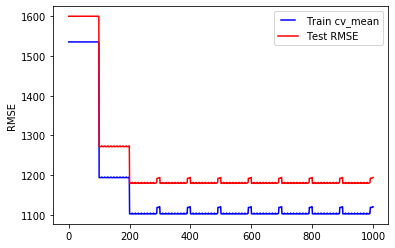

In [125]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(np.linspace(0,len(training_score),len(training_score)), training_score, 'b', label='Train cv_mean')
line2, = plt.plot(np.linspace(0,len(test_score),len(test_score)), test_score, 'r', label='Test RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMSE')
#plt.xlabel('Tree depth')
plt.show()

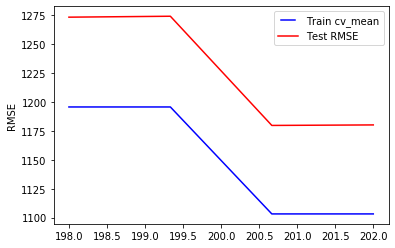

In [126]:
from matplotlib.legend_handler import HandlerLine2D
yytrain = training_score[198:202]
yytest = test_score[198:202]
xx = np.linspace(198, 202, len(yytrain))

line1, = plt.plot(xx, yytrain, 'b', label='Train cv_mean')
line2, = plt.plot(xx, yytest, 'r', label='Test RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMSE')
#plt.xlabel('Tree depth')
plt.show()

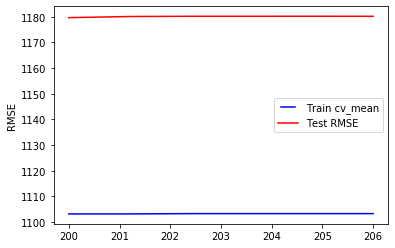

In [127]:
from matplotlib.legend_handler import HandlerLine2D
yytrain = training_score[200:206]
yytest = test_score[200:206]
xx = np.linspace(200, 206, len(yytrain))

line1, = plt.plot(xx, yytrain, 'b', label='Train cv_mean')
line2, = plt.plot(xx, yytest, 'r', label='Test RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMSE')
#plt.xlabel('Tree depth')
plt.show()

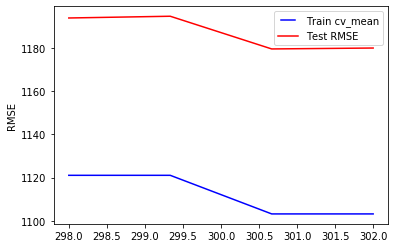

In [128]:
from matplotlib.legend_handler import HandlerLine2D
yytrain = training_score[298:302]
yytest = test_score[298:302]
xx = np.linspace(298, 302, len(yytrain))

line1, = plt.plot(xx, yytrain, 'b', label='Train cv_mean')
line2, = plt.plot(xx, yytest, 'r', label='Test RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMSE')
#plt.xlabel('Tree depth')
plt.show()


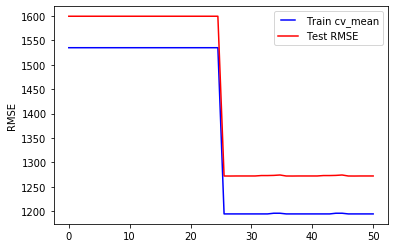

In [129]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(np.linspace(0,len(training_score[75:125]),len(training_score[75:125])), training_score[75:125], 'b', label='Train cv_mean')
line2, = plt.plot(np.linspace(0,len(test_score[75:125]),len(test_score[75:125])), test_score[75:125], 'r', label='Test RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMSE')
#plt.xlabel('Tree depth')
plt.show()

In [130]:
# find the first smallest RMSE occurance
np.argmin(test_score)

300

In [131]:
np.argmin(training_score)

381

In [132]:
test_score[np.argmin(test_score)]

1179.6110258583153

In [133]:
test_score[np.argmin(training_score)]

1179.957551670151

In [134]:
training_score[np.argmin(training_score)]

1103.0763744626483

In [135]:
training_score[np.argmin(test_score)]

1103.1993786079115

In [136]:
depth[np.argmin(training_score)]

10.666666666666668

In [137]:
depth[np.argmin(test_score)]

10.666666666666668

In [138]:
leaf[np.argmin(training_score)]

0.01011111111111111

In [139]:
leaf[np.argmin(test_score)]

0.01


Model Report
Validation dataset RMSE: 1103
CV score: Mean and 95% confidence interval  - 1180 (+/- 151.02)| Std - 75.51 | Min - 975.5 | Max - 1282


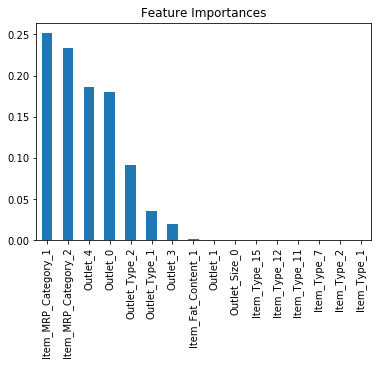

In [140]:
from sklearn.tree import DecisionTreeRegressor

filename = 'C:\\Users\\LOHANI\Desktop\\bigmart-sales\\model8.csv'
model8 = DecisionTreeRegressor(max_depth=depth[np.argmin(test_score)], min_samples_leaf=leaf[np.argmin(test_score)])
modelfit(model8, X_train, X_test, y_train, y_test, test, IDcols, target, filename)

# visualise result
coef8 = pd.Series(model8.feature_importances_, X_train.columns).sort_values(ascending=False)
coef8.plot(kind='bar', title='Feature Importances')

In [145]:
pred=model8.predict(o_test)

NameError: name 'o_test' is not defined

In [150]:
pred=pd.DataFrame(pred)

In [152]:
pred.to_csv("C:\\Users\\LOHANI\\Desktop\\bigmart-sales\\predicted.csv")

In [146]:
# import data
train_s = pd.read_csv('C:\\Users\\LOHANI\\Desktop\\bigmart-sales\\train_s.csv')
test_s = pd.read_csv('C:\\Users\\LOHANI\\Desktop\\bigmart-sales\\test_s.csv')

train_s = train_s.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)
test_s = test_s.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)

# separate data into train and test sets
from sklearn.model_selection import train_test_split

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(train_s.loc[:, train_s.columns != 'Item_Outlet_Sales'], train_s['Item_Outlet_Sales'], test_size=0.2, random_state=42)

# get chosen features
file = 'C:\\Users\\LOHANI\\Desktop\\bigmart-sales\\features.txt'
with open(file, 'r') as f:
    features = f.readlines()
features = [x[:-1] for x in features]    

file = 'C:\\Users\\LOHANI\\Desktop\\bigmart-sales\\not_features.txt'
with open(file, 'r') as f:
    not_features = f.readlines()
not_features = [x[:-1] for x in not_features]    

X_train_s = X_train_s.drop(not_features, axis=1)
X_test_s = X_test_s.drop(not_features, axis=1)
test_s = test_s.drop(not_features, axis=1)

In [147]:
# import modules
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping

from sklearn.model_selection import cross_val_score
from sklearn import metrics

# define variables
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [174]:
model = Sequential()

    # Add the first layer
model.add(Dense(nodes, activation='relu', input_shape=(n_cols,)))
    
    # Add mode layers
if layers==2:
    model.add(Dense(100, activation='relu'))
elif layers==3:
        model.add(Dense(100, activation='relu'))
        model.add(Dense(100, activation='relu'))
elif layers==4:
        model.add(Dense(n_rows, activation='relu'))
        model.add(Dense(n_rows, activation='relu'))
        model.add(Dense(n_rows, activation='relu'))
        model.add(Dense(n_rows, activation='relu'))

    # Add the output layer
model.add(Dense(1))




def modelfit(model, lr, predictors, predictors_test, target, target_test):
     
    # Create SGD optimizer with specified learning rate: my_optimizer
    my_optimizer = SGD(lr=lr)
    
    # Compile the model
    model.compile(optimizer=my_optimizer, loss='mean_squared_error', metrics=['MSE'])
    
    # Define early_stopping_monitor
    early_stopping_monitor = EarlyStopping(patience=2)
    
    # Fit the model
    model.fit(predictors, target, epochs=100, callbacks=[early_stopping_monitor])
#    hist = model.fit(predictors, target, validation_split=0.3, epochs=100, callbacks=[early_stopping_monitor])
    
    # predict training set
    predictions = model.predict(predictors_test)
    
    # print model report
    print('\nModel Report')
    print('Validation dataset RMSE: %.4g' %np.sqrt(metrics.mean_squared_error(predictions, target_test)))

Epoch 1/100
6818/6818 [==============================] - 1s 108us/step - loss: 2970691.0534 - mean_squared_error: 2970691.0534
Epoch 2/100
2240/6818 [========>.....................] - ETA: 0s - loss: 2989337.2750 - mean_squared_error: 2989337.2750

E:\python3.7\lib\site-packages\keras\callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


6818/6818 [==============================] - 0s 67us/step - loss: 2966099.6333 - mean_squared_error: 2966099.6333
Epoch 3/100
6818/6818 [==============================] - 0s 66us/step - loss: 2967796.8850 - mean_squared_error: 2967796.8850
Epoch 4/100
6818/6818 [==============================] - 0s 66us/step - loss: 2965863.7686 - mean_squared_error: 2965863.7686
Epoch 5/100
6818/6818 [==============================] - 0s 66us/step - loss: 2970414.8469 - mean_squared_error: 2970414.8469
Epoch 6/100
6818/6818 [==============================] - 0s 66us/step - loss: 2967499.1797 - mean_squared_error: 2967499.1797
Epoch 7/100
6818/6818 [==============================] - 0s 66us/step - loss: 2961654.0135 - mean_squared_error: 2961654.0135
Epoch 8/100
6818/6818 [==============================] - 0s 67us/step - loss: 2964848.6126 - mean_squared_error: 2964848.6126
Epoch 9/100
6818/6818 [==============================] - 0s 66us/step - loss: 2969484.1832 - mean_squared_error: 2969484.1832
Epoc

Epoch 66/100
6818/6818 [==============================] - 0s 61us/step - loss: 2964846.5013 - mean_squared_error: 2964846.5013
Epoch 67/100
6818/6818 [==============================] - 0s 63us/step - loss: 2964341.9287 - mean_squared_error: 2964341.9287
Epoch 68/100
6818/6818 [==============================] - 0s 63us/step - loss: 2967865.6966 - mean_squared_error: 2967865.6966
Epoch 69/100
6818/6818 [==============================] - 0s 63us/step - loss: 2967839.0913 - mean_squared_error: 2967839.0913
Epoch 70/100
6818/6818 [==============================] - 0s 64us/step - loss: 2965231.6233 - mean_squared_error: 2965231.6233
Epoch 71/100
6818/6818 [==============================] - 0s 63us/step - loss: 2967674.2144 - mean_squared_error: 2967674.2144
Epoch 72/100
6818/6818 [==============================] - 0s 62us/step - loss: 2970128.9026 - mean_squared_error: 2970128.9026
Epoch 73/100
6818/6818 [==============================] - 0s 63us/step - loss: 2966761.4831 - mean_squared_erro

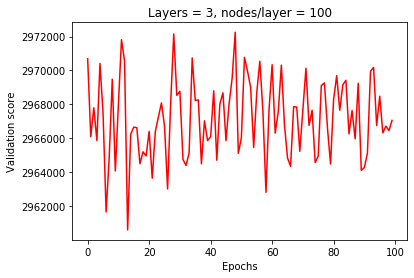

In [182]:
#define variables
predictors = X_train_s
target = y_train_s
n_rows = predictors.shape[0]
n_cols = predictors.shape[1]
lr = 0.000001
layers = 3
nodes = 100

# Build new model to test, unaffected by previous models
model1 = Sequential()

    # Add the first layer
model1.add(Dense(nodes, activation='relu', input_shape=(n_cols,)))
    
    # Add mode layers
if layers==2:
    model1.add(Dense(100, activation='relu'))
elif layers==3:
        model1.add(Dense(100, activation='relu'))
        model1.add(Dense(100, activation='relu'))
elif layers==4:
        model1.add(Dense(n_rows, activation='relu'))
        model1.add(Dense(n_rows, activation='relu'))
        model1.add(Dense(n_rows, activation='relu'))
        model1.add(Dense(n_rows, activation='relu'))

    # Add the output layer
model1.add(Dense(1))

# fit model
modelfit(model, lr, predictors, X_test_s, target, y_test_s)

# Create the plot
plt.plot(model.history.history['mean_squared_error'], 'r')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.title('Layers = {}, nodes/layer = {}'.format(layers, nodes))
plt.show()